In [25]:
import osmnx as ox
import pandas as pd
import geocoder
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [26]:
price_today= pd.read_excel('price_today.xlsx')
df_acum= pd.read_excel('df_definitivo.xlsx')

In [27]:
geolocator = Nominatim(user_agent="My-App")
location = geolocator.geocode("Avenida Brasilia, 27, Madrid") 

print((location.latitude, location.longitude))

(40.4402741, -3.6610318)


In [28]:
type(location)

geopy.location.Location

In [29]:
diccionario={'REPSOL': 'REPSOL.png', 'CEPSA': 'CEPSA.png'}
diccionario


{'REPSOL': 'REPSOL.png', 'CEPSA': 'CEPSA.png'}

In [30]:
price_today = price_today.sort_values('Distance')
price_head=price_today.head(3)
price_head

,Provincia,Municipio,Localidad,Código postal,Dirección,Longitud,Latitud,Precio gasolina 95 E5,Precio gasolina 95 E5 Premium,Precio gasolina 98 E5,Precio gasóleo A,Precio gasóleo Premium,Rótulo,Horario,Fecha de extracción,Latitud_partida,Longitud_partida,mercator_start,mercator_finish,Distance
6683,MADRID,Madrid,MADRID,28028,"CALLE BERLIN, S/N, S/N",-3.664333,40.441222,"1,875",No disponible,No disponible,"1,880","1,941",CEPSA,L-D: 07:00-21:30,24-04-2022,40.440274,-3.661032,POINT (4501790.72035241 -407821.8017149498),POINT (4501896.240097732 -408190.0417713508),383.060251
6682,MADRID,Madrid,MADRID,28028,"AVENIDA DE LOS TOREROS, S/N",-3.661944,40.434306,"1,875",No disponible,No disponible,"1,880","1,941",CEPSA,L-S: 07:00-21:00; D: 9:00-14:00,24-04-2022,40.440274,-3.661032,POINT (4501790.72035241 -407821.8017149498),POINT (4501126.354499406 -407923.5550565211),672.112884
6689,MADRID,Madrid,MADRID,28002,"CALLE CORAZON DE MARIA, 11",-3.669500,40.441611,"1,919",No disponible,No disponible,"1,949","1,999",CEPSA,L-V: 07:00-19:00; S: 09:00-15:00,24-04-2022,40.440274,-3.661032,POINT (4501790.72035241 -407821.8017149498),POINT (4501939.543379651 -408766.409570259),956.259533


In [47]:
mapa_loop = folium.Map(location=[40.546376,-3.638541], zoom_start=15)

#marker_cluster = MarkerCluster().add_to(mapa_loop)

def ubi_gasolinera(price_head):
    for i in range(0,len(price_head)):
        html=f"""
            <div style="font-family: arial; color: black">
            <h><b> {price_head.iloc[i]['Rótulo']}</h></b>
            <p>Prices:</p>
                <li> Gasolina 95:{price_head.iloc[i]['Precio gasolina 95 E5']} €</li>
                <li> Diésel:{price_head.iloc[i]['Precio gasóleo A']} €</li>
            <p><b>Dirección:</b></p>
            <p>{price_head.iloc[i]['Dirección']}</p>
            </ul> 
            </p>
            <img src="my_plot_name.png">
            <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p></div>
            """
        
        iframe = folium.IFrame(html=html, width=200, height=200)
        popup = folium.Popup(iframe, max_width=2650)
        
        folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="green",  icon="ok-sign"),
        ).add_to(mapa_loop)
        
    return mapa_loop

def ubi_actual(price_head):
    html=f"""
        <div style="font-family: times new roman; color: green">
        <h><b> Actualmente te encuentras aquí </b></h></div>
        """
    iframe = folium.IFrame(html=html, width=150, height=60)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[price_head.iloc[0]['Latitud_partida'],price_head.iloc[0]['Longitud_partida']],
        popup=popup,
        icon=folium.Icon(color="cadetblue",  icon="home"),
).add_to(mapa_loop)  
    return mapa_loop
    
ubi_gasolinera(price_head)
ubi_actual(price_head)

2022-04-24 17:33:48.410 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-24 17:33:48.413 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-24 17:33:48.418 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-04-24 17:33:48.422 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


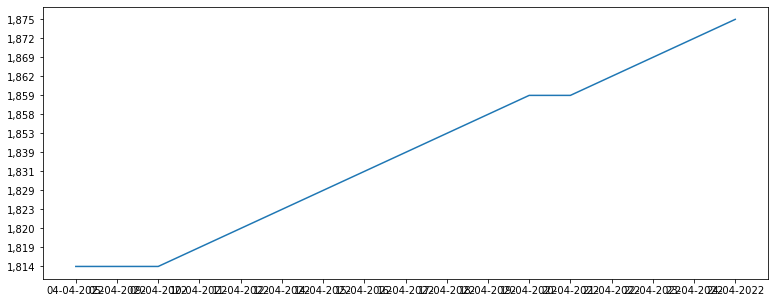

In [32]:
df_grafico=[]
direccion_gasolineras=list(price_head['Dirección'].unique())
for i in direccion_gasolineras:
    df_grafico.append(df_acum[df_acum.Dirección.isin([i])])
df_grafico[0]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13,5))
x= df_grafico[0]['Fecha de extracción']
y= df_grafico[0] ['Precio gasolina 95 E5'].sort_values()

ax.plot(x,y)
plt.show()
fig.savefig("my_plot_name.png")

In [33]:
# introducir imagen con html para meter el grafico en la etiqueta.
#https://python-graph-gallery.com/312-add-markers-on-folium-map

In [34]:
#st.title('Map of Gas')

2022-04-24 17:33:48.765 
  command:

    streamlit run /Users/Andrea/miniconda3/envs/proj-final/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [35]:
#folium_static(mapa_loop)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [56]:
#mapa_loop.py

SyntaxError: invalid syntax (494728032.py, line 1)

In [ ]:
mapa_loop = folium.Map(location=[40.546376,-3.638541], zoom_start=15)

#marker_cluster = MarkerCluster().add_to(mapa_loop)

def ubi_gasolinera(price_head):
    for i in range(0,len(price_head)):
        html=f"""
            <div style="font-family: arial; color: black">
            <h><b> {price_head.iloc[i]['Rótulo']}</h></b>
            <p>Prices:</p>
                <li> Gasolina 95:{price_head.iloc[i]['Precio gasolina 95 E5']} €</li>
                <li> Diésel:{price_head.iloc[i]['Precio gasóleo A']} €</li>
            <p><b>Dirección:</b></p>
            <p>{price_head.iloc[i]['Dirección']}</p>
            </ul> 
            </p>
            <img src="my_plot_name.png">
            <p>And that's a <a href="https://www.python-graph-gallery.com">link</a></p></div>
            """
        
        iframe = folium.IFrame(html=html, width=200, height=200)
        popup = folium.Popup(iframe, max_width=2650)
        
        if price_head[price_head.iloc[i]['Rótulo']== Green
        
        folium.Marker(
                location=[price_head.iloc[i]['Latitud'],price_head.iloc[i]['Longitud']],
                popup=popup,
                icon=folium.Icon(color="green",  icon="ok-sign"),
        ).add_to(mapa_loop)
        
    return mapa_loop

def ubi_actual(price_head):
    html=f"""
        <div style="font-family: times new roman; color: green">
        <h><b> Actualmente te encuentras aquí </b></h></div>
        """
    iframe = folium.IFrame(html=html, width=150, height=60)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker(
        location=[price_head.iloc[0]['Latitud_partida'],price_head.iloc[0]['Longitud_partida']],
        popup=popup,
        icon=folium.Icon(color="cadetblue",  icon="home"),
).add_to(mapa_loop)  
    return mapa_loop
    
ubi_gasolinera(price_head)
ubi_actual(price_head)